<a href="https://colab.research.google.com/github/benjarojas/ADA-Informes/blob/main/KnapsackProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Knapsack Problem

**Entrada:** *Un número $W > 0$ que corresponde al **peso máximo de la mochila** y $2$ arreglos $W_T$ y $\text{Val}$ de tamaño $n$ que corresponden al **peso de cada ítem y a su valor respectivamente**.*

**Salida:** *La **máxima ganancia obtenible** sumando items con un **peso total** $\leq W$.*  

El **Problema de la Mochila** o **Knapsack Problem** es un problema de ***optimización combinatoria***, que consiste en que dado un conjunto de objetos con un **determinado peso y valor**, se debe calcular la **combinación de objetos que maximiza el valor total y que el peso total debe ser menor o igual a un límite establecido $W$**.

# 2. Código

## 2.1 Generador de Instancias Aleatorias

In [2]:
import random

def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = random.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = random.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt

## 2.2 Algoritmo Bottom-Up (Programación Dinámica)

In [3]:
from termcolor import colored
import numpy as np

def knapsack(W, wt, val, verbose=False):
  n = len(val)
  
  subp = 0

  # inicializamos matriz en 0
  K = np.array([[0]*(W+1)]*(len(wt) + 1))

  # construimos tabla K (bottom-up)
  if(verbose): print("Construimos tabla K")
  for i in range(n + 1):
    if(verbose and i != 0):
      print(f"Calculando soluciones para el objeto {colored(str(i), 'blue')}")
    
    for w in range(W + 1):
      if i == 0 or w == 0:
        K[i][w] = 0
        subp += 1

      elif wt[i-1] <= w:
        if verbose == True and wt[i-1] == w:
          print(f"Maximo peso soportado: {colored(str(w), 'red')}")
          print(f"Valor máximo anterior: {colored(str(K[i-1][w]), 'blue')}")
          print(f"Valor máximo al elegir el item {colored(str(i), 'blue')}: {colored(str(val[i-1] + K[i-1][w-wt[i-1]]), 'green')}")
        K[i][w] = max(val[i-1] + K[i-1][w-wt[i-1]], K[i-1][w])
        subp += 1

        if verbose and wt[i-1] == w:
          print(f"Solución óptima para el subproblema: {colored(str(K[i][w]), 'magenta')}\n")

      else:
        K[i][w] = K[i-1][w]
        subp += 1
  if(verbose): print(f"Solución óptima para la entrada: {colored(str(K[n][w]), 'green')}")
  return K[n][W], subp

In [4]:
val = [60, 100, 120] # arreglo de valores
wt = [10, 20, 30] # arreglo de pesos
W = 50 # capacidad máxima de la mochila
maxVal, subp = knapsack(W, wt, val) # ejemplo
print(f"máximo valor: {maxVal}\n{subp} subproblemas.")

máximo valor: 220
204 subproblemas.


## 2.3 Algoritmo Greedy

In [20]:
import operator

def greedy_knapsack(maxW, wt, val, verbose=False):
    n = len(val)
    ratio = {}
    iter = 0
    for i in range(n):
        iter += 1
        ratio_calc = val[i]/wt[i]
        ratio[i] = ratio_calc
    ratio = sorted(ratio.items(), key=operator.itemgetter(1), reverse=True)
    if(verbose):
      for key in enumerate(ratio):
        print(f"{colored(str((key[1][0])+1), 'blue')} tiene valor por unidad de peso de {colored(str(key[1][1]), 'red')}")
    maxVal = 0
    for key in enumerate(ratio):
        iter += 1
        if(wt[key[1][0]]) <= maxW:
            maxVal += val[key[1][0]]
            maxW -= wt[key[1][0]]
            if(verbose):
              print(f"Se agrega el elemento {colored(str(key[1][0]+1), 'blue')}. Valor: {colored(str(val[key[1][0]]), 'green')} - Peso: {colored(str(wt[key[1][0]]), 'magenta')}")
              print(f"Peso restante en la mochila: {colored(str(maxW), 'red')}")
    if(verbose): print(f"Se retorna la solución máxima encontrada: {colored(str(maxVal), 'green')}")
    return maxVal, iter

In [22]:
val = [60, 100, 120] # arreglo de valores
wt = [10, 20, 30] # arreglo de pesos
W = 50 # capacidad máxima de la mochila
maxVal, iter = greedy_knapsack(W, wt, val) # ejemplo
print(f"máximo valor: {maxVal}\n{iter} iteraciones.")

máximo valor: 160
6 iteraciones.


# 3. Descripción del Algoritmo

## 3.1 Acercamiento **Bottom-Up**

La implementación basada en el paradigma **Bottom-Up** consiste en los siguientes pasos:

1.   Creamos una matriz $K_{ij}$ de dimensiones $n \times W$ donde $n$ es el **tamaño del problema** y $W$ corresponde al **peso máximo de la mochila**.
2.   Luego iteramos en la matriz $K$ usando **2 ciclos** y dos índices $i$ y $w$, donde $i$ **iterará sobre las $n$ filas** y **$w$ iterará sobre las $W$ columnas**.
3.   **Construimos la tabla** según las siguientes **condiciones**:
*    Sí $i = 0$ ó $w = 0$, entonces $K[i,w]=0$.
*    Sí $W_T[i-1] \leq w$, entonces $K[i,w] = \text{max}(val[i-1] + K[i-1, w-W_T[i-1]]$.
*    En **cualquier otro caso**, $K[i, w] = K[i-1, w]$.
4.   Retornamos **el valor total de la solución óptima, que se encontrará en $K[n, W]$**.


### 3.1.1 Subestructura Óptima y Solución Recursiva

Tenemos que $\text{knapsack}(W, W_T, \text{val}, n)$ es la función que describe el problema donde se pueden elegir ítems en el intervalo $[1 \ldots n]$ bajo la restricción de $W$ (peso de la mochila).

Si $(x_1, x_2, \ldots, x_n)$ es una solución óptima para el problema, entonces:

*   Si $x_n = 0$ (no elegimos el $n$-ésimo objeto), entonces $(x_1, x_2, \ldots, x_{n-1})$ debe ser una solución óptima para el problema $\text{knapsack}(W, W_T-1, \text{val}-1, n-1)$.
*   Si $x_n = 1$ (elegimos el $n$-ésimo objeto), entonces $(x_1, x_2, \ldots, x_{n-1})$ debe ser una solución óptima para el problema $\text{knapsack}(W-w_n, W_T-1, \text{val}-1, n-1)$ donde $w_n$ corresponde al peso del $n$-ésimo ítem.

Basándonos en la subestructura óptima, podemos definir la solución para el problema de la mochila de la siguiente forma:

Sea $K[n, W]$ el óptimo valor para el problema $\text{knapsack}(W, W_T, \text{val}, n)$:

$K[n, W] = \text{max}(K[n-1, W], K[n-1, W - w_n] + \text{val}_n)$

Y análogamente:

$K[n-1, W] = \text{max}(K[n-2, W], K[n-2, W - w_{n-1}] + \text{val}_{n-1})$

$K[n-1, W - w_n] = \text{max}(K[n-2, W - w_n], K[n-2, W - w_{n} - w_{n-1}] + \text{val}_{n-1})$

Con la subestructura óptima, podemos también crear una tabla donde se almacenen las soluciones de una forma ***bottom-up***.

Sea $K[i, w]$ un elemento en la matriz de soluciones $K$, que representará el valor total de la solución óptima del problema $\text{knapsack}(w, W_T, \text{val}, i)$ que es el subproblema de seleccionar ítems en el sub-intervalo $[1 \ldots i]$ sujeto a la restricción de peso $w$.

Entonces, $K[i, w] = \text{max}(K[i-1, w], K[i-1, W - w_{i}] + \text{val}_{\text{ i}})$.

Al generar la tabla, necesitamos establecer las siguientes condiciones:

*   Cuando $i = 0$ no se eligió ningún objeto, por lo que $K[i,w] = 0$.
*   Cuando $w = 0$ no hay mas espacio en la mochila, por lo que $K[i,w] = 0$.
*   Cuando $w_i > w$, el objeto actual $i$ excede la capacidad, por lo que no podemos elegirlo. En este caso, $K[i,w] = K[i-1,w]$.

A partir de lo anterior, podemos definir la solución recursiva como:

$$ K[i,w]=   \left\{
\begin{array}{ll}
      0 & \text{si } i=0 \ \text{ó } w=0  \\
      K[i-1,w] & \text{si } w_i > w \\
      \text{max}(K[i-1, w], K[i-1, W - w_{i}] + \text{val}_{\text{ i}}) & \text{si } i>0 \text{ y } w \geq w_i \\
\end{array} 
\right.  $$

Luego de generar la tabla, la solución óptima para el problema se encontrará en el índice de la matriz $K[n,W]$.


### 3.1.2 Ejecución paso a paso (`verbose=True`)

In [8]:
W, val, wt = knapsack_instance_generator(5)
knapsack(W, wt, val, verbose=True)

Construimos tabla K
Calculando soluciones para el objeto 1
Maximo peso soportado: 7
Valor máximo anterior: 0
Valor máximo al elegir el item 1: 87
Solución óptima para el subproblema: 87

Calculando soluciones para el objeto 2
Maximo peso soportado: 12
Valor máximo anterior: 87
Valor máximo al elegir el item 2: 121
Solución óptima para el subproblema: 121

Calculando soluciones para el objeto 3
Maximo peso soportado: 14
Valor máximo anterior: 121
Valor máximo al elegir el item 3: 202
Solución óptima para el subproblema: 202

Calculando soluciones para el objeto 4
Maximo peso soportado: 17
Valor máximo anterior: 202
Valor máximo al elegir el item 4: 252
Solución óptima para el subproblema: 252

Calculando soluciones para el objeto 5
Maximo peso soportado: 26
Valor máximo anterior: 339
Valor máximo al elegir el item 5: 331
Solución óptima para el subproblema: 339

Solución óptima para la entrada: 541


(541, 234)

### 3.1.3 Ejemplo de ejecución

Supongamos la siguiente entrada para el algoritmo:

*   $n = 4$ *(4 ítems)*
*   $W = 5$ *(peso máximo 5 unidades)*
*   $W_T = [2,3,4,5]$ *(peso de cada ítem)*
*   $\text{val } = [3,4,5,6]$ *(valor de cada ítem)*

Primero generamos la matriz de dimensión $4 \times 5$, y rellenamos con $0$ los campos donde $i = 0$ ó $w = 0$.

![picture](https://i.imgur.com/Hrdrevr.png)

Luego calculamos los problemas de $i = 1$ y $W = [1 \ldots 5]$


*   Para $i=1, w=1$ no se cumple ninguna de las condiciones del código, por lo que $K[1][1] = K[i-1][w]$, es decir $K[1][1] = K[0][1] = 0$
*   Para $i=1, w=2$ se cumple que $W_T[i-1] \leq w$ $(W_T[0] = 2 = w)$, por lo que $K[1][2] = \text{max}(val[0]+K[0][2-wt[0], K[0][2])$, y de esta comparación termina siendo mayor la expresión $val[0]+K[0][2-wt[0]) = 3 + 0 = 3$, es decir, $K[1][2] = 3$
*   Para $i=1, w=3$ se cumple que $W_T[i-1] \leq w$ $(W_T[0] = 2 < w = 3)$, por lo que $K[1][3] = \text{max}(val[0]+K[0][3-wt[0], K[0][3])$, y de esta comparación termina siendo mayor la expresión $val[0]+K[0][3-wt[0]] = 3$
*   Para $i=1, w=4$ se cumple que $W_T[i-1] \leq w$ $(W_T[0] = 2 < w = 4)$, por lo que $K[1][4] = \text{max}(val[0]+K[0][4-wt[0], K[0][4])$, y de esta comparación termina siendo mayor la expresión $val[0]+K[0][4-wt[0]] = 3$
*   Para $i=1, w=5$ se cumple que $W_T[i-1] \leq w$ $(W_T[0] = 2 < w = 5)$, por lo que $K[1][5] = \text{max}(val[0]+K[0][5-wt[0], K[0][5])$, y de esta comparación termina siendo mayor la expresión $val[0]+K[0][5-wt[0]] = 3$

Insertamos los sub-problemas en la matriz:

![picture](https://i.imgur.com/JTQ9IuQ.png)

Y así seguimos hasta completar nuestra matriz de sub-problemas:

![picture](https://i.imgur.com/oJWBIVb.png)

Donde nuestra solución óptima se encontrará en el índice $K[4][5]$, que es lo que retornará nuestro algoritmo.

## 3.2 Implementación **Greedy**

La implementación **Greedy** de este algoritmo se basa en un **ratio valor/peso** para saber si elegir o no un objeto.

El algoritmo **calculará esta proporción para cada objeto** y lo insertará de manera ordenada en un **diccionario auxiliar**, y al finalizar se asumirá que el **primer objeto en el arreglo será el que tiene un mayor beneficio y se sumará al knapsack**.

Se sumará el siguiente elemento del diccionario y así sucesivamente hasta **alcanzar la restricción del peso máximo de la mochila**.

### 3.2.1 Ejecución paso a paso (`verbose=True`)

In [23]:
W, val, wt = knapsack_instance_generator(5)
greedy_knapsack(W, wt, val, verbose=True)

3 tiene valor por unidad de peso de 13.833333333333334
1 tiene valor por unidad de peso de 13.571428571428571
5 tiene valor por unidad de peso de 13.11111111111111
2 tiene valor por unidad de peso de 12.75
4 tiene valor por unidad de peso de 12.647058823529411
Se agrega el elemento 3. Valor: 166 - Peso: 12
Peso restante en la mochila: 19
Se agrega el elemento 1. Valor: 95 - Peso: 7
Peso restante en la mochila: 12
Se agrega el elemento 2. Valor: 102 - Peso: 8
Peso restante en la mochila: 4
Se retorna la solución máxima encontrada: 363


(363, 10)

### 3.2.2 Ejemplo de ejecución

Supongamos la siguiente entrada para el algoritmo:

*   $n = 4$ *(4 ítems)*
*   $W = 25$ *(peso máximo 25 unidades)*
*   $W_T = [24,10,10,7]$ *(peso de cada ítem)*
*   $\text{val } = [24,18,18,10]$ *(valor de cada ítem)*

Calcularemos el **ratio valor/peso** para cada objeto, que quedará de la forma:

$[1, 1.8, 1.8, 1.42]$

**El algoritmo tomará el objeto con menor relación valor/peso**, que es el primero, que tiene peso $24$ unidades y valor $24$, y **esto no permite que se ingresen mas elementos a la mochila**, por lo que **se retornará la solución $24$** como el máximo valor obtenible, que como podemos apreciar, **no es la solución óptima global.**

# 4. Análisis del tiempo de ejecución

## 4.1 Tiempo de ejecución del algoritmo **Bottom-Up**

Para analizar el tiempo de ejecución del algoritmo, basta con observar la parte principal del código:
![picture](https://i.imgur.com/focUjFi.png)


1.   Se utilizan 2 ciclos `for`, que iteran en los intervalos $[0 \ldots n]$ y $[0 \ldots W]$ respectivamente. Como ya sabemos, la complejidad de bucles anidados corresponde a la cantidad de veces que se ejecuta la sentencia de más adentro. En este caso, será $n \cdot W$, por lo que la complejidad de esta sección es: $O(nW)$
2.   Luego asignamos un valor a un índice de la matriz $K$, esto tiene complejidad constante $O(1)$.
3.   Ahora, asignamos un valor a un índice de la matriz $K$, pero también utilizamos la función `max()`, que tiene tiempo de ejecución $O(n)$ donde $n$ es la cantidad de elementos, pero ya que solo comparamos 2 elementos la complejidad de esta sección es $O(2)$
4.   Finalmente asignamos un valor a un índice de la matriz $K$, esto tiene complejidad constante $O(1)$.

De esta forma, sumando las complejidades obtenemos la siguiente expresión, y al expresarla en notación asintótica obtenemos el tiempo de ejecución del algoritmo **Bottom-Up**: 

$O(nW)+O(1)+O(2)+O(1) = O(nW)$. $\blacksquare$

## 4.2 Tiempo de ejecución del Algoritmo **Greedy**.

Para analizar el tiempo de ejecución de este algoritmo, basta con ver el código.

![picture](https://i.imgur.com/z1ahz2K.png)

Como podemos ver, existen 3 principales operaciones:



1.   Calcular el **ratio valor/peso**, esto tiene complejidad $O(n)$.
2.   Ordenar cada **ratio valor/peso** dentro del diccionario utilizando `sorted()`, esta función de **Python** utiliza el algoritmo **Timsort**, que tiene tiempo de ejecución $O(n \ log \ n)$.
3.   Iterar en el diccionario y calcular la solución tiene complejidad $O(n)$.

Al sumar las complejidades del algoritmo y expresarlas en notación asintótica, obtenemos que **el tiempo de ejecución del algoritmo greedy es $O(n \ log \ n)$.** $\blacksquare$



# 5. Correctitud


## 5.1 Correctitud del Algoritmo **Bottom-Up**

### **Hipótesis**
> *En cada iteración, **el algoritmo retorna el valor óptimo para un peso máximo $w$**, esto quiere decir que en la última iteración, el valor máximo retornado será la solución óptima global para el peso $W$ de la entrada del problema.*

### **Prueba de la Hipótesis**
Para probar esta hipótesis, utilizaremos inducción matemática.

**Caso base:** En la primera iteración, el peso máximo $w$ será $0$, es decir, no se seleccionó ningún objeto, por lo que el algoritmo retornará el valor máximo $0$, que trivialmente es el máximo valor obtenible para $0$ objetos.

**Paso inductivo:** Para pesos mayores $w>0$, el algoritmo primero verificará si el peso del objeto a agregar no supera la restricción establecida por el peso $w$, y de cumplirse, se compara si el valor del objeto a agregar mas el máximo beneficio obtenible con el peso restante de la mochila es mayor que el máximo beneficio obtenible con la iteración anterior para el mismo peso, y el algoritmo elegirá la solución que sea mayor.

A partir del paso inductivo podemos saber que en la última iteración ($w = W$), se comparará el máximo valor posible agregando o no el objeto con mayor peso seleccionable, y de esta manera, se retornará el máximo valor obtenible según la restricción de peso $W$. $\blacksquare$

## 5.2 ¿Por qué no es correcto el algoritmo **Greedy**?

La **solución óptima global** para el **problema de la mochila** es tomar el **objeto con el mayor ratio valor/peso**. La **propiedad greedy dice que la solución óptima global puede ser obtenida a partir de una solución óptima local**. En esta versión del algoritmo llamada **0/1 Knapsack** donde solo podemos decidir si llevar un objeto o no, **esta propiedad no se puede cumple**. Esto se puede demostrar fácilmente con un ejemplo:

Digamos que nuestra capacidad total de la mochila sea igual a una constante $c$, quedando $W = c$, y tenemos un tamaño de problema $n=2$.
Sea el peso del primer objeto $w_1 = c$ y su precio $\text{val}_1 = 1$. El peso del segundo objeto será $w_2 = 1$ y su precio $\text{val}_2 = 1$. El algoritmo greedy seleccionará únicamente el objeto 2, pero la solución óptima global corresponde a seleccionar el objeto 1. Esto significa que obtenemos una solución $c-1$ veces menor que el verdadero óptimo global.

# 6. Experimentos

## 6.1 Comparación de los tiempos de ejecución en función del tamaño del problema

Se comparará experimentalmente el tiempo de ejecución de ambos algoritmos con entradas aleatorias de tamaño $n \in [5,50]$ generadas con un **generador de instancias aleatorias**.

También, para hacer mas evidente la comparación se medirá el tiempo de ejecución del algoritmo **Greedy** con entradas aleatorias de tamaño $n \in [5,500]$ generadas con un **generador de instancias aleatorias**.

### 6.1.1 Comparación de ambos algoritmos con entradas aleatorias

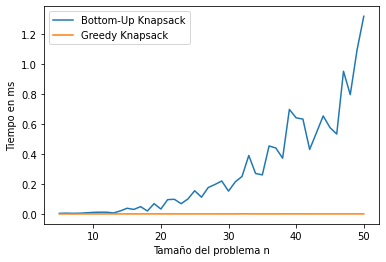

In [ ]:
import datetime
import random
from timeit import repeat
import matplotlib.pyplot as plt

x=[]; y1=[]; y2=[]

for n in range(5,51):

    W, wt, val = knapsack_instance_generator(n)

    # repeat() ejecuta 10 veces los algoritmos con la instancia aleatoria y retorna el mejor tiempo obtenido
    t_dynamic = repeat(setup="from __main__ import knapsack", stmt=f"knapsack({W}, {wt}, {val})", repeat=1, number=10)
    t_greedy = repeat(setup="from __main__ import greedy_knapsack", stmt=f"greedy_knapsack({W}, {wt}, {val})", repeat=1, number=10)
    x.append(n)
    y1.append(t_dynamic)
    y2.append(t_greedy)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Bottom-Up Knapsack", "Greedy Knapsack"])

plt.xlabel('Tamaño del problema n')
plt.ylabel('Tiempo en ms')
plt.show()

### 6.1.2 Medición del tiempo del algoritmo Greedy

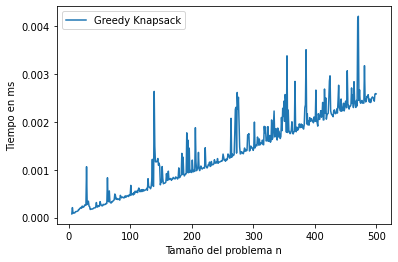

In [ ]:
import datetime
import random
from timeit import repeat
import matplotlib.pyplot as plt

x=[]; y1=[]

for n in range(5,501):

    W, wt, val = knapsack_instance_generator(n)

    # repeat() ejecuta 10 veces los algoritmos con la instancia aleatoria y retorna el mejor tiempo obtenido
    t_greedy = repeat(setup="from __main__ import greedy_knapsack", stmt=f"greedy_knapsack({W}, {wt}, {val})", repeat=1, number=10)
    x.append(n)
    y1.append(t_greedy)

plt.plot(x,y1)
plt.legend(["Greedy Knapsack"])

plt.xlabel('Tamaño del problema n')
plt.ylabel('Tiempo en ms')
plt.show()

### 6.1.3 Análisis de resultados

Como se puede observar en el primer gráfico, el algoritmo **Bottom-Up** es mucho menos eficiente que el algoritmo **greedy**, ya que **para tamaños de problema grande este supera los** $1.2 \text{[ms]}$, mientras que el algoritmo **Greedy se mantiene demasiado cerca de los los** $0 \text{[ms]}$. Esto se hace mas evidente al observar la segunda gráfica, que muestra que para un tamaño de problema $500$ el algoritmo está bajo los $0.003 \text{[ms]}$.

## 6.2 Cantidad de **iteraciones/subproblemas** en función del tamaño

Se comparará experimentalmente la cantidad de ambos algoritmos con entradas aleatorias de tamaño $n \in [5,100]$ generadas con un **generador de instancias aleatorias**.

Tambien, se mediran por separado los algoritmos con el mismo tamaño de problema.

### 6.2.1 Comparación de ambos algoritmos

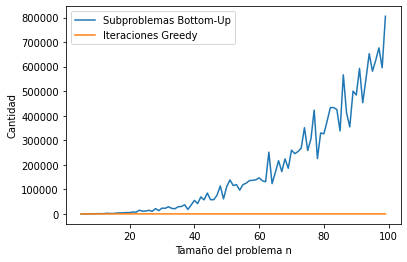

In [ ]:
import matplotlib.pyplot as plt

x=[]; y1=[]; y2=[]

for n in range(5,100):

    W, wt, val = knapsack_instance_generator(n)

    maxV, subp = knapsack(W, wt, val)
    maxV, iter = greedy_knapsack(W, wt, val)
    
    x.append(n)
    y1.append(subp)
    y2.append(iter)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Subproblemas Bottom-Up", "Iteraciones Greedy"])

plt.xlabel('Tamaño del problema n')
plt.ylabel('Cantidad')
plt.show()

### 6.2.2 Iteraciones algoritmo Greedy

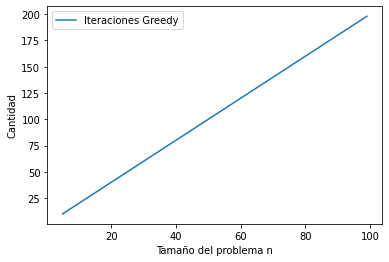

In [ ]:
import matplotlib.pyplot as plt

x=[]; y1=[]

for n in range(5,100):

    W, wt, val = knapsack_instance_generator(n)

    maxV, iter = greedy_knapsack(W, wt, val)
    
    x.append(n)
    y1.append(iter)

plt.plot(x,y1)
plt.legend(["Iteraciones Greedy"])

plt.xlabel('Tamaño del problema n')
plt.ylabel('Cantidad')
plt.show()

### 6.2.3 Subproblemas algoritmo Bottom-Up

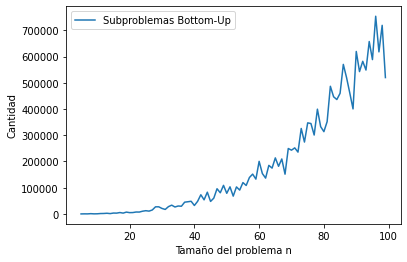

In [ ]:
import matplotlib.pyplot as plt

x=[]; y1=[]

for n in range(5,100):

    W, wt, val = knapsack_instance_generator(n)

    maxV, subp = knapsack(W, wt, val)
    
    x.append(n)
    y1.append(subp)

plt.plot(x,y1)
plt.legend(["Subproblemas Bottom-Up"])

plt.xlabel('Tamaño del problema n')
plt.ylabel('Cantidad')
plt.show()

### 6.2.4 Análisis de resultados

Como se puede observar en los resultados, la versión **Greedy** del algoritmo muestra tener una relación **lineal** entre el tamaño del problema y la cantidad de iteraciones realizadas, mientras que la versión **Bottom-Up** muestra una relación **exponencial**, esto es fácil de apreciar al observar el tamaño de problema $100$, donde el algoritmo **Greedy** debe realizar $200$ iteraciones, mientras que el algoritmo **Bottom-Up resuelve $700000$ subproblemas**, por lo que demuestra ser mucho mas ineficiente temporalmente hablando.

## 6.3 Valores máximos alcanzados
Compararemos experimentalmente las **soluciones entregadas por los algoritmos para la misma entrada aleatoria**, con un tamaño de problema $n \in [5,50]$.

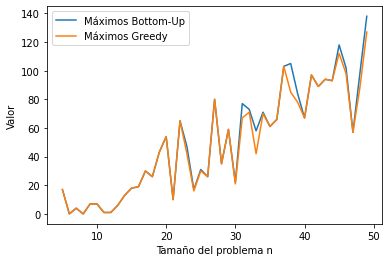

In [10]:
import matplotlib.pyplot as plt

x=[]; y1=[]; y2=[]

for n in range(5,50):

    W, wt, val = knapsack_instance_generator(n)

    maxBU, subp = knapsack(W, wt, val)
    maxG, iter = greedy_knapsack(W, wt, val)
    
    x.append(n)
    y1.append(maxBU)
    y2.append(maxG)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Máximos Bottom-Up", "Máximos Greedy"])

plt.xlabel('Tamaño del problema n')
plt.ylabel('Valor')
plt.show()

### 6.3.1 Análisis de resultados

Al analizar la gráfica, es evidente que el algoritmo **bottom-up** siempre entrega una solución **mayor o igual** que el algoritmo **greedy**, esto pone en evidencia que **el algoritmo greedy a pesar de ser mas eficiente temporalmente que el algoritmo bottom-up, no siempre logra encontrar la solución óptima global.**